<a href="https://colab.research.google.com/github/XERYVEL/Trabajo_Final_Cs_Datos/blob/Revision-Final/An%C3%A1lisis_completo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Librerías para manipulación de datos
import numpy as np
import pandas as pd

# Librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías para Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, chi2

# Modelos de Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Evaluación de modelos
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# @title Cargar los datos desde el archivo CSV
data = pd.read_csv('DATASET.csv')  # Reemplazar si es necesario

# Mostrar las primeras filas del dataset para entender su estructura
print("Primeras 15 filas del dataset:")
data.head(15)

Primeras 15 filas del dataset:


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59.0,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042.0,1.0,-1,0,unknown,yes
1,56.0,admin.,married,secondary,no,45,no,no,unknown,5,may,NaN,1.0,-1,0,unknown,yes
2,41.0,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389.0,1.0,-1,0,unknown,yes
3,55.0,services,married,secondary,no,2476,yes,no,unknown,5,may,579.0,1.0,-1,0,unknown,yes
4,54.0,admin.,married,tertiary,no,184,no,no,unknown,5,may,673.0,2.0,-1,0,unknown,yes
5,42.0,management,single,tertiary,no,0,yes,yes,unknown,5,may,562.0,2.0,-1,0,unknown,yes
6,56.0,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201.0,1.0,-1,0,unknown,yes
7,60.0,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030.0,1.0,-1,0,unknown,yes
8,37.0,technician,married,secondary,no,1,yes,no,unknown,6,may,608.0,1.0,-1,0,unknown,yes
9,28.0,services,single,secondary,no,5090,yes,no,unknown,6,may,1297.0,3.0,-1,0,unknown,yes


In [3]:
# Mostrar el numero de filas y de columnas que hay en el dataset
data.shape

(11162, 17)

In [4]:
# Descripcion de los datos
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,10828.000000,11162.000000,11162.000000,10604.000000,10046.000000,11162.000000,11162.000000
mean,41.209642,1528.538524,15.658036,372.674085,2.500000,51.330407,0.832557
std,11.895570,3225.413326,8.420740,348.045444,2.693862,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,497.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [5]:
# Mostrar información sobre el dataset
print("\nInformación del dataset:")
data.info()

# Verificar si hay valores nulos
print("\nValores nulos por columna:")
data.isnull().sum()


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        10828 non-null  float64
 1   job        11162 non-null  object 
 2   marital    11162 non-null  object 
 3   education  11162 non-null  object 
 4   default    11162 non-null  object 
 5   balance    11162 non-null  int64  
 6   housing    11162 non-null  object 
 7   loan       11162 non-null  object 
 8   contact    11162 non-null  object 
 9   day        11162 non-null  int64  
 10  month      11162 non-null  object 
 11  duration   10604 non-null  float64
 12  campaign   10046 non-null  float64
 13  pdays      11162 non-null  int64  
 14  previous   11162 non-null  int64  
 15  poutcome   11162 non-null  object 
 16  deposit    11162 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 1.4+ MB

Valores nulos por columna:


,0
age,334
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


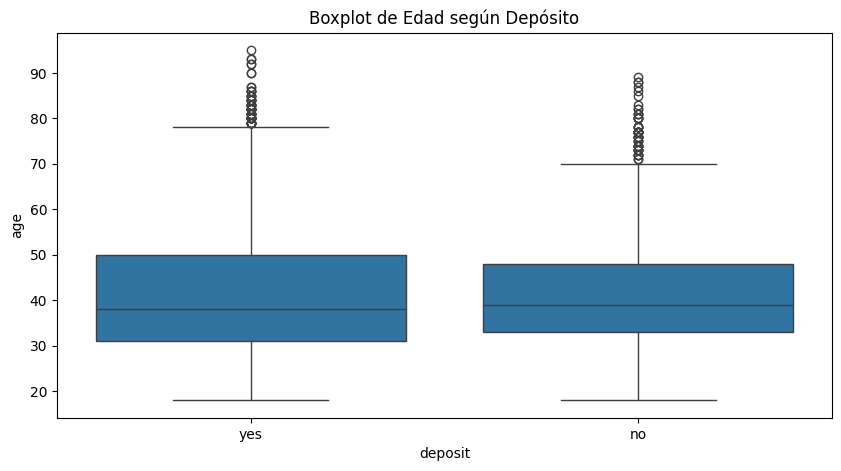

In [6]:
# Gráfico de caja y bigotes (Boxplot)
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x='deposit', y='age')
plt.title("Boxplot de Edad según Depósito")
plt.show()

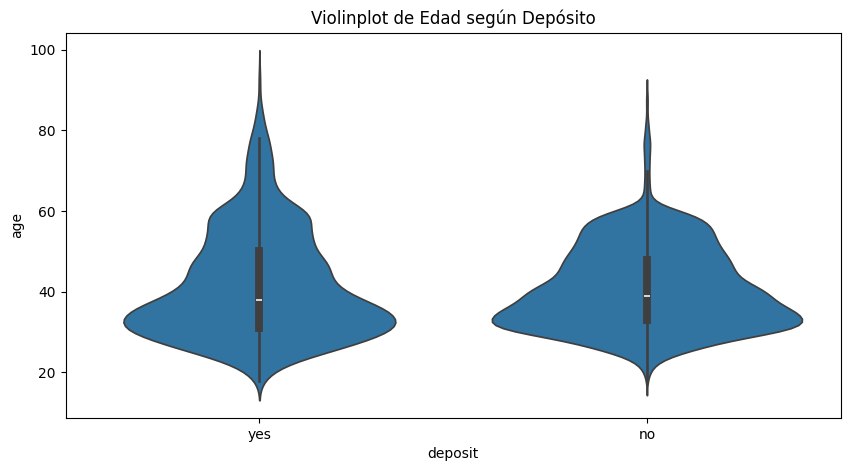

In [7]:
# Gráfico de violín
plt.figure(figsize=(10, 5))
sns.violinplot(data=data, x='deposit', y='age')
plt.title("Violinplot de Edad según Depósito")
plt.show()


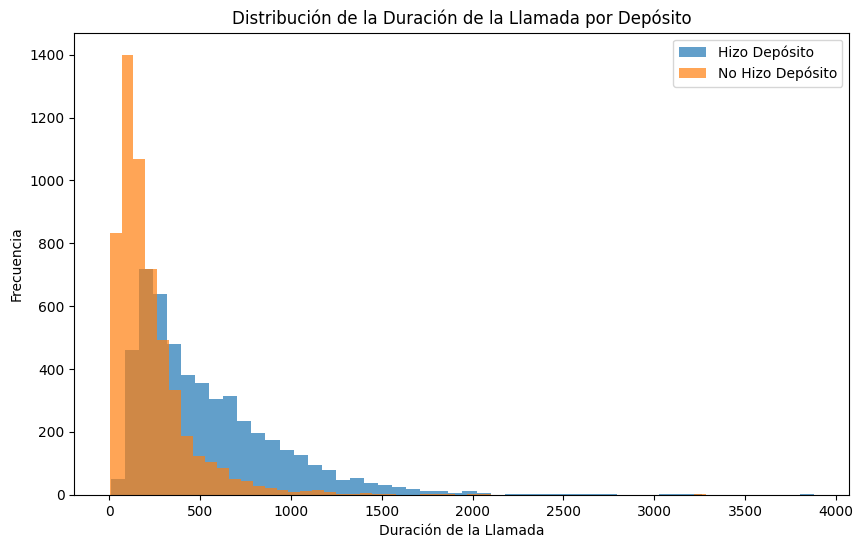

In [8]:
# Separar los datos basados en la columna 'deposit'
deposit_yes = data[data['deposit'] == 'yes']['duration']
deposit_no = data[data['deposit'] == 'no']['duration']

# Crear histogramas
plt.figure(figsize=(10, 6))

plt.hist(deposit_yes, bins=50, alpha=0.7, label='Hizo Depósito')
plt.hist(deposit_no, bins=50, alpha=0.7, label='No Hizo Depósito')

plt.xlabel('Duración de la Llamada')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Duración de la Llamada por Depósito')
plt.legend()
plt.show()

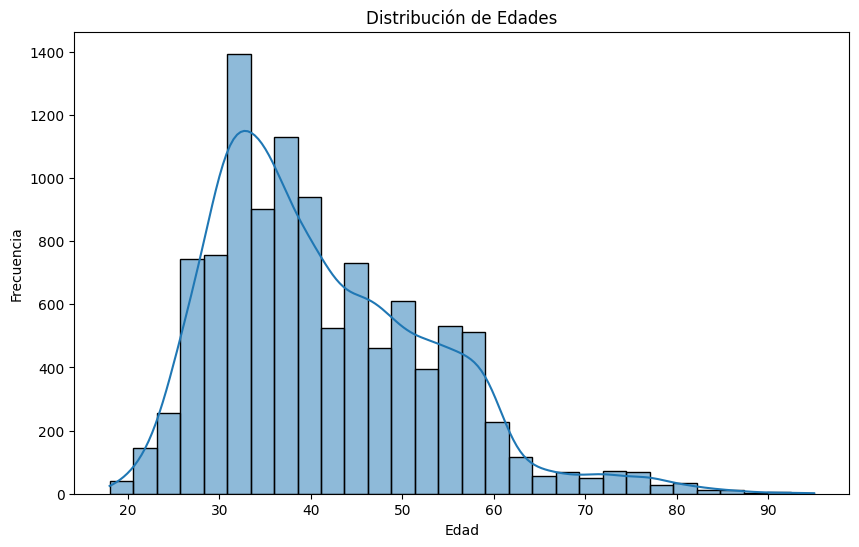

In [9]:
#Grafico de distribucion de las edades
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='age', bins=30, kde=True)
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

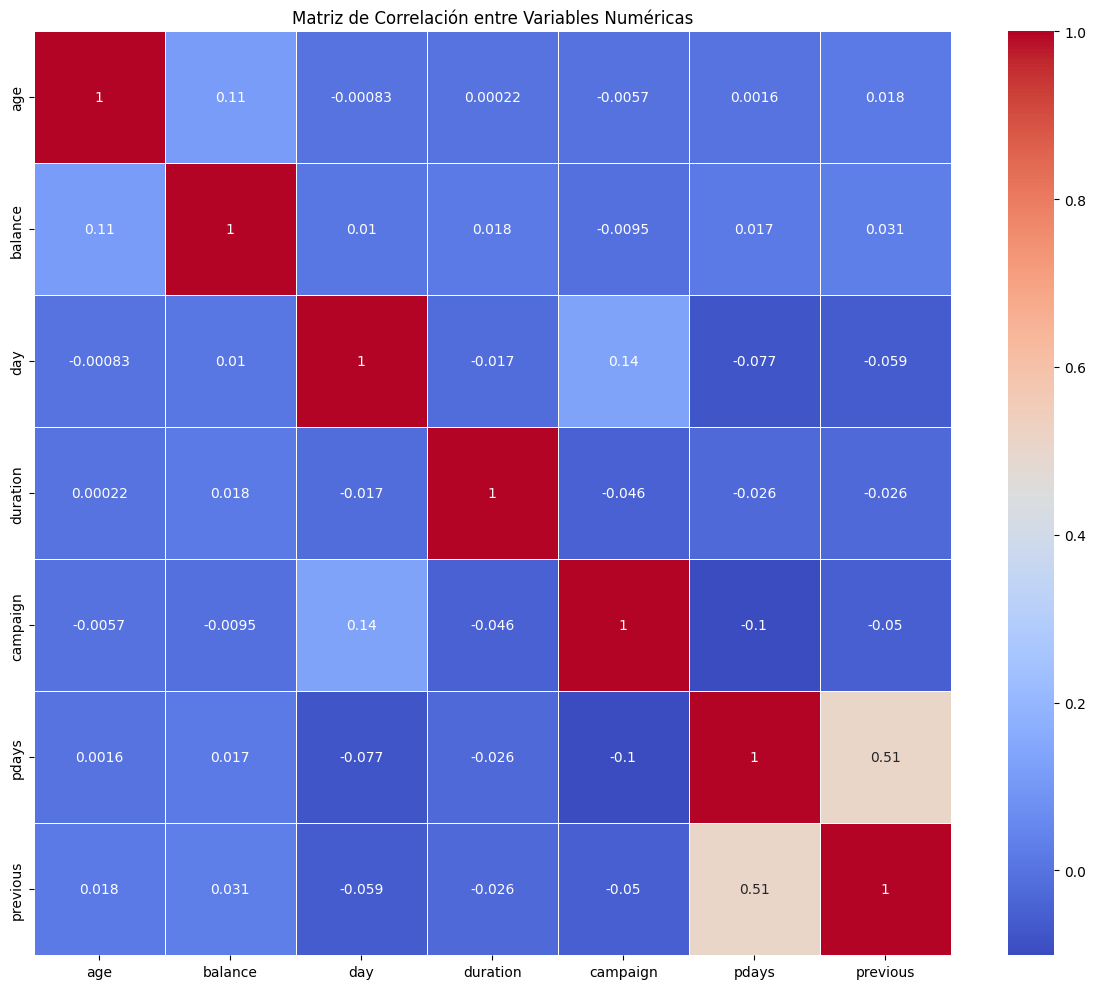

In [10]:
# Análisis de correlación
plt.figure(figsize=(12, 10))
# Seleccionamos solo columnas numéricas para la matriz de correlación
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
correlation = data[numeric_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.tight_layout()
plt.show()

In [11]:
#creacion de un segundo dataframe
data1 = data.copy()

In [12]:
# Definir los trabajos que se consideran 'employed'
employed_jobs = ['management', 'blue-collar', 'technician', 'admin.', 'services', 'self-employed', 'entrepreneur', 'housemaid']
# Crear una nueva columna 'job_grouped'
def group_job(job):
    if job in employed_jobs:
        return 'employed'
    else:
        return job

data1['job_grouped'] = data1['job'].apply(group_job)

In [13]:
#Manejo de los datos catrgoricos
# Realizar one-hot encoding en la columna
data1 = pd.get_dummies(data1, columns=['housing'], prefix='housing')
data1 = pd.get_dummies(data1, columns=['loan'], prefix='loan')
data1 = pd.get_dummies(data1, columns=['job_grouped'], prefix='job')

In [14]:
# Mostrar las primeras filas para ver los cambios
print("Primeras 10 filas del dataset después de One-Hot Encoding:")
data1.head(10)

Primeras 10 filas del dataset después de One-Hot Encoding:


,age,job,marital,education,default,balance,contact,day,month,duration,...,deposit,housing_no,housing_yes,loan_no,loan_yes,job_employed,job_retired,job_student,job_unemployed,job_unknown
0,59.0,admin.,married,secondary,no,2343,unknown,5,may,1042.0,...,yes,False,True,True,False,True,False,False,False,False
1,56.0,admin.,married,secondary,no,45,unknown,5,may,NaN,...,yes,True,False,True,False,True,False,False,False,False
2,41.0,technician,married,secondary,no,1270,unknown,5,may,1389.0,...,yes,False,True,True,False,True,False,False,False,False
3,55.0,services,married,secondary,no,2476,unknown,5,may,579.0,...,yes,False,True,True,False,True,False,False,False,False
4,54.0,admin.,married,tertiary,no,184,unknown,5,may,673.0,...,yes,True,False,True,False,True,False,False,False,False
5,42.0,management,single,tertiary,no,0,unknown,5,may,562.0,...,yes,False,True,False,True,True,False,False,False,False
6,56.0,management,married,tertiary,no,830,unknown,6,may,1201.0,...,yes,False,True,False,True,True,False,False,False,False
7,60.0,retired,divorced,secondary,no,545,unknown,6,may,1030.0,...,yes,False,True,True,False,False,True,False,False,False
8,37.0,technician,married,secondary,no,1,unknown,6,may,608.0,...,yes,False,True,True,False,True,False,False,False,False
9,28.0,services,single,secondary,no,5090,unknown,6,may,1297.0,...,yes,False,True,True,False,True,False,False,False,False


In [15]:
data1 = data1.drop(['job'], axis=1, errors='ignore')

In [16]:
# Calcular la media de la columna 'age'
median_age = data['age'].median()

# Rellenar los valores faltantes en la columna 'age' con la media
data1['age'].fillna(median_age, inplace=True)


/tmp/ipython-input-16-880123615.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data1['age'].fillna(median_age, inplace=True)


In [17]:
# Calcular la media de la columna 'age'
median_dur = data['duration'].median()

# Rellenar los valores faltantes en la columna 'age' con la media
data1['duration'].fillna(median_dur, inplace=True)


/tmp/ipython-input-17-555556163.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data1['duration'].fillna(median_dur, inplace=True)


In [18]:
# Calcular la media de la columna 'age'
median_cam = data['campaign'].median()

# Rellenar los valores faltantes en la columna 'age' con la media
data1['campaign'].fillna(median_cam, inplace=True)


/tmp/ipython-input-18-3388404268.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data1['campaign'].fillna(median_cam, inplace=True)


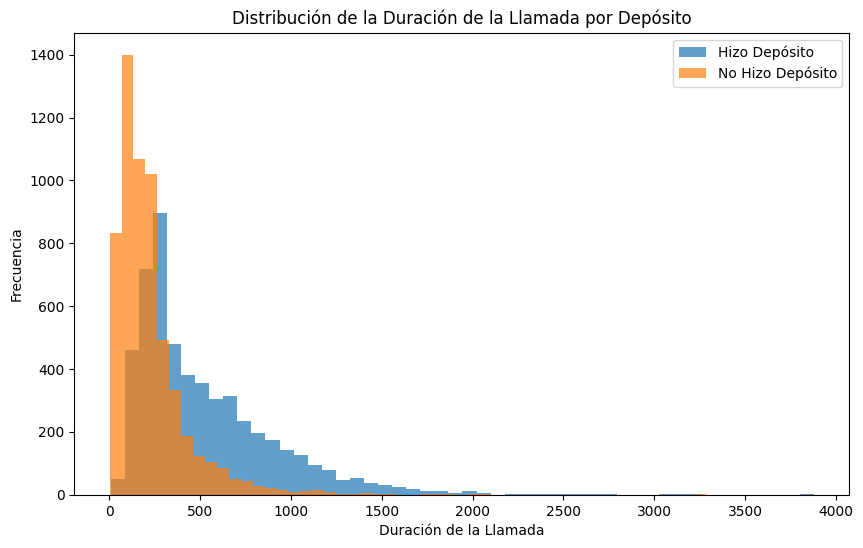

In [19]:
# Separar los datos basados en la columna 'deposit'
deposit_yes = data1[data1['deposit'] == 'yes']['duration']
deposit_no = data1[data1['deposit'] == 'no']['duration']

# Crear histogramas
plt.figure(figsize=(10, 6))

plt.hist(deposit_yes, bins=50, alpha=0.7, label='Hizo Depósito')
plt.hist(deposit_no, bins=50, alpha=0.7, label='No Hizo Depósito')

plt.xlabel('Duración de la Llamada')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Duración de la Llamada por Depósito')
plt.legend()
plt.show()

In [20]:
data1["default"].value_counts()

,count
default,
no,10994
yes,168


In [21]:
#Manejo de los datos categoricos
# Realizar one-hot encoding en la columna
data1 = pd.get_dummies(data1, columns=['marital'], prefix='marital')
data1 = pd.get_dummies(data1, columns=['education'], prefix='education')
data1 = pd.get_dummies(data1, columns=['month'], prefix='month')

In [22]:
#Manejo de los datos categoricos
# Realizar one-hot encoding en la columna
data1 = pd.get_dummies(data1, columns=['poutcome'], prefix='poutcome')
data1 = pd.get_dummies(data1, columns=['contact'], prefix='contact')

In [23]:
# Mostrar las primeras filas para ver los cambios
print("Primeras 10 filas del dataset después de One-Hot Encoding:")
data1.head(10)

Primeras 10 filas del dataset después de One-Hot Encoding:


,age,default,balance,day,duration,campaign,pdays,previous,deposit,housing_no,...,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,contact_cellular,contact_telephone,contact_unknown
0,59.0,no,2343,5,1042.0,1.0,-1,0,yes,False,...,False,False,False,False,False,False,True,False,False,True
1,56.0,no,45,5,255.0,1.0,-1,0,yes,True,...,False,False,False,False,False,False,True,False,False,True
2,41.0,no,1270,5,1389.0,1.0,-1,0,yes,False,...,False,False,False,False,False,False,True,False,False,True
3,55.0,no,2476,5,579.0,1.0,-1,0,yes,False,...,False,False,False,False,False,False,True,False,False,True
4,54.0,no,184,5,673.0,2.0,-1,0,yes,True,...,False,False,False,False,False,False,True,False,False,True
5,42.0,no,0,5,562.0,2.0,-1,0,yes,False,...,False,False,False,False,False,False,True,False,False,True
6,56.0,no,830,6,1201.0,1.0,-1,0,yes,False,...,False,False,False,False,False,False,True,False,False,True
7,60.0,no,545,6,1030.0,1.0,-1,0,yes,False,...,False,False,False,False,False,False,True,False,False,True
8,37.0,no,1,6,608.0,1.0,-1,0,yes,False,...,False,False,False,False,False,False,True,False,False,True
9,28.0,no,5090,6,1297.0,3.0,-1,0,yes,False,...,False,False,False,False,False,False,True,False,False,True


In [24]:
# Reemplazar los valores de la columna 'previous'
data1['previous'] = data1['previous'] > 0

# Mostrar las primeras filas para verificar los cambios
print("Primeras 10 filas del dataset después de reemplazar los valores en 'previous':")
data1.head(10)

Primeras 10 filas del dataset después de reemplazar los valores en 'previous':


,age,default,balance,day,duration,campaign,pdays,previous,deposit,housing_no,...,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,contact_cellular,contact_telephone,contact_unknown
0,59.0,no,2343,5,1042.0,1.0,-1,False,yes,False,...,False,False,False,False,False,False,True,False,False,True
1,56.0,no,45,5,255.0,1.0,-1,False,yes,True,...,False,False,False,False,False,False,True,False,False,True
2,41.0,no,1270,5,1389.0,1.0,-1,False,yes,False,...,False,False,False,False,False,False,True,False,False,True
3,55.0,no,2476,5,579.0,1.0,-1,False,yes,False,...,False,False,False,False,False,False,True,False,False,True
4,54.0,no,184,5,673.0,2.0,-1,False,yes,True,...,False,False,False,False,False,False,True,False,False,True
5,42.0,no,0,5,562.0,2.0,-1,False,yes,False,...,False,False,False,False,False,False,True,False,False,True
6,56.0,no,830,6,1201.0,1.0,-1,False,yes,False,...,False,False,False,False,False,False,True,False,False,True
7,60.0,no,545,6,1030.0,1.0,-1,False,yes,False,...,False,False,False,False,False,False,True,False,False,True
8,37.0,no,1,6,608.0,1.0,-1,False,yes,False,...,False,False,False,False,False,False,True,False,False,True
9,28.0,no,5090,6,1297.0,3.0,-1,False,yes,False,...,False,False,False,False,False,False,True,False,False,True


In [25]:
# Reemplazar los valores de la columna 'previous'
data1['pdays'] = data1['pdays'] > 0

# Mostrar las primeras filas para verificar los cambios
print("Primeras 10 filas del dataset después de reemplazar los valores en 'previous':")
data1.head(10)

Primeras 10 filas del dataset después de reemplazar los valores en 'previous':


,age,default,balance,day,duration,campaign,pdays,previous,deposit,housing_no,...,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,contact_cellular,contact_telephone,contact_unknown
0,59.0,no,2343,5,1042.0,1.0,False,False,yes,False,...,False,False,False,False,False,False,True,False,False,True
1,56.0,no,45,5,255.0,1.0,False,False,yes,True,...,False,False,False,False,False,False,True,False,False,True
2,41.0,no,1270,5,1389.0,1.0,False,False,yes,False,...,False,False,False,False,False,False,True,False,False,True
3,55.0,no,2476,5,579.0,1.0,False,False,yes,False,...,False,False,False,False,False,False,True,False,False,True
4,54.0,no,184,5,673.0,2.0,False,False,yes,True,...,False,False,False,False,False,False,True,False,False,True
5,42.0,no,0,5,562.0,2.0,False,False,yes,False,...,False,False,False,False,False,False,True,False,False,True
6,56.0,no,830,6,1201.0,1.0,False,False,yes,False,...,False,False,False,False,False,False,True,False,False,True
7,60.0,no,545,6,1030.0,1.0,False,False,yes,False,...,False,False,False,False,False,False,True,False,False,True
8,37.0,no,1,6,608.0,1.0,False,False,yes,False,...,False,False,False,False,False,False,True,False,False,True
9,28.0,no,5090,6,1297.0,3.0,False,False,yes,False,...,False,False,False,False,False,False,True,False,False,True


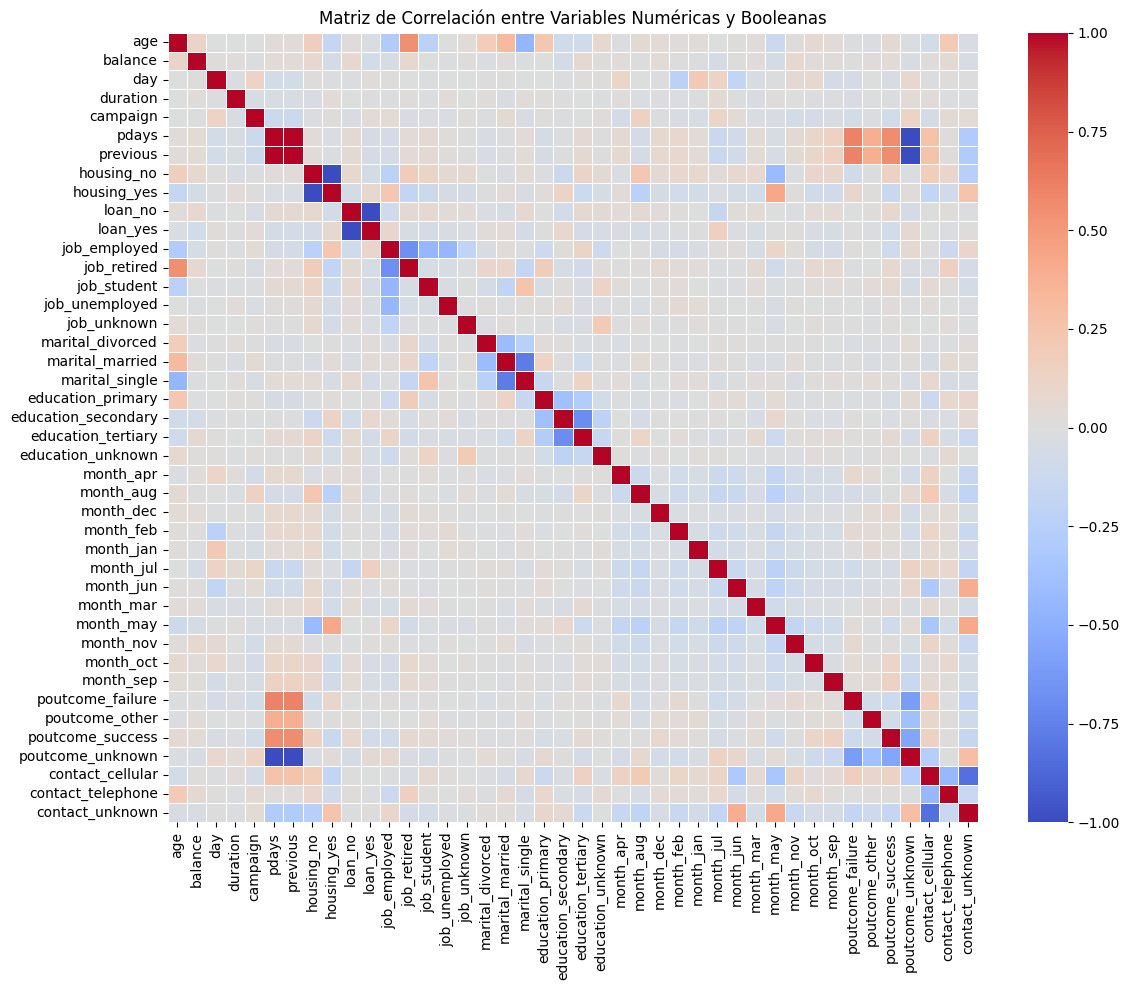

In [26]:
# Análisis de correlación
plt.figure(figsize=(12, 10))
# Seleccionamos solo columnas numéricas y booleanas para la matriz de correlación
numeric_and_bool_cols = data1.select_dtypes(include=['int64', 'float64', 'bool']).columns
correlation = data1[numeric_and_bool_cols].corr()
sns.heatmap(correlation, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación entre Variables Numéricas y Booleanas')
plt.tight_layout()
plt.show()

In [27]:
# Inicializar el escalador Min-Max
minmax_scaler = MinMaxScaler()

# Ajustar el escalador a la columna 'balance' y transformar los datos
data1['balance'] = minmax_scaler.fit_transform(data1[['balance']])

# Ajustar el escalador a la columna 'balance' y transformar los datos
data1['duration'] = minmax_scaler.fit_transform(data1[['duration']])

In [28]:
# Ajustar el escalador a la columna 'balance' y transformar los datos
data1['campaign'] = minmax_scaler.fit_transform(data1[['campaign']])

In [29]:
# Mostrar las primeras filas para verificar los cambios
print("Primeras 10 filas del dataset:")
data1.head(10)

Primeras 10 filas del dataset:


,age,default,balance,day,duration,campaign,pdays,previous,deposit,housing_no,...,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,contact_cellular,contact_telephone,contact_unknown
0,59.0,no,0.104371,5,0.268110,0.000000,False,False,yes,False,...,False,False,False,False,False,False,True,False,False,True
1,56.0,no,0.078273,5,0.065223,0.000000,False,False,yes,True,...,False,False,False,False,False,False,True,False,False,True
2,41.0,no,0.092185,5,0.357566,0.000000,False,False,yes,False,...,False,False,False,False,False,False,True,False,False,True
3,55.0,no,0.105882,5,0.148750,0.000000,False,False,yes,False,...,False,False,False,False,False,False,True,False,False,True
4,54.0,no,0.079851,5,0.172983,0.016129,False,False,yes,True,...,False,False,False,False,False,False,True,False,False,True
5,42.0,no,0.077762,5,0.144367,0.016129,False,False,yes,False,...,False,False,False,False,False,False,True,False,False,True
6,56.0,no,0.087188,6,0.309100,0.000000,False,False,yes,False,...,False,False,False,False,False,False,True,False,False,True
7,60.0,no,0.083951,6,0.265017,0.000000,False,False,yes,False,...,False,False,False,False,False,False,True,False,False,True
8,37.0,no,0.077773,6,0.156226,0.000000,False,False,yes,False,...,False,False,False,False,False,False,True,False,False,True
9,28.0,no,0.135569,6,0.333849,0.032258,False,False,yes,False,...,False,False,False,False,False,False,True,False,False,True


In [30]:
#Manejo de los datos categoricos
# Realizar one-hot encoding en la columna
data1 = pd.get_dummies(data1, columns=['default'], prefix='default')

In [31]:
# Separación entre variables predictoras y objetivo
X = data1.drop('deposit_yes', axis=1) if 'deposit_yes' in data1.columns else data1.drop('deposit', axis=1)
y = data1['deposit_yes'] if 'deposit_yes' in data1.columns else data1['deposit'].map({'yes': 1, 'no': 0})

# División de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

In [32]:
#Inicializar los modelos
logistic_model = LogisticRegression(random_state=42)

# Entrenar los modelos
logistic_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [33]:
# Predicciones
logistic_pred = logistic_model.predict(X_test)

# Precisión
print(f"Precisión Regresión Logística: {accuracy_score(y_test, logistic_pred):.4f}")

Precisión Regresión Logística: 0.8102


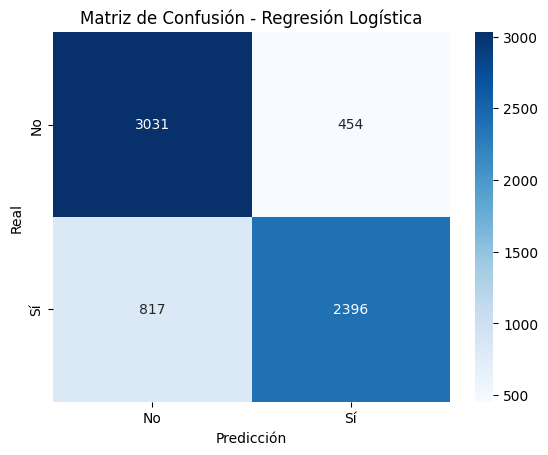

In [34]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No', 'Sí'],
                yticklabels=['No', 'Sí'])
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.title(title)
    plt.show()
plot_confusion_matrix(y_test, logistic_pred, "Matriz de Confusión - Regresión Logística")

In [35]:
print("Reporte de Clasificación - Regresión Logística")
print(classification_report(y_test, logistic_pred))

Reporte de Clasificación - Regresión Logística
              precision    recall  f1-score   support

           0       0.79      0.87      0.83      3485
           1       0.84      0.75      0.79      3213

    accuracy                           0.81      6698
   macro avg       0.81      0.81      0.81      6698
weighted avg       0.81      0.81      0.81      6698



Analizamos los mismos modelos con leves cambios en el dataset

In [36]:
data2 = data1.copy()

In [37]:
data2 = data2.drop(['housing_no'], axis=1, errors='ignore')
data2 = data2.drop(['pdays'], axis=1, errors='ignore')
data2 = data2.drop(['loan_no'], axis=1, errors='ignore')
data2 = data2.drop(['default_no'], axis=1, errors='ignore')
data2 = data2.drop(['poutcome_unknown'], axis=1, errors='ignore')
data2 = data2.drop(['contact_unknown'], axis=1, errors='ignore')
data2 = data2.drop(['marital_single'], axis=1, errors='ignore')
data2 = data2.drop(['education_tertiary'], axis=1, errors='ignore')
data2 = data2.drop(['job_retired'], axis=1, errors='ignore')

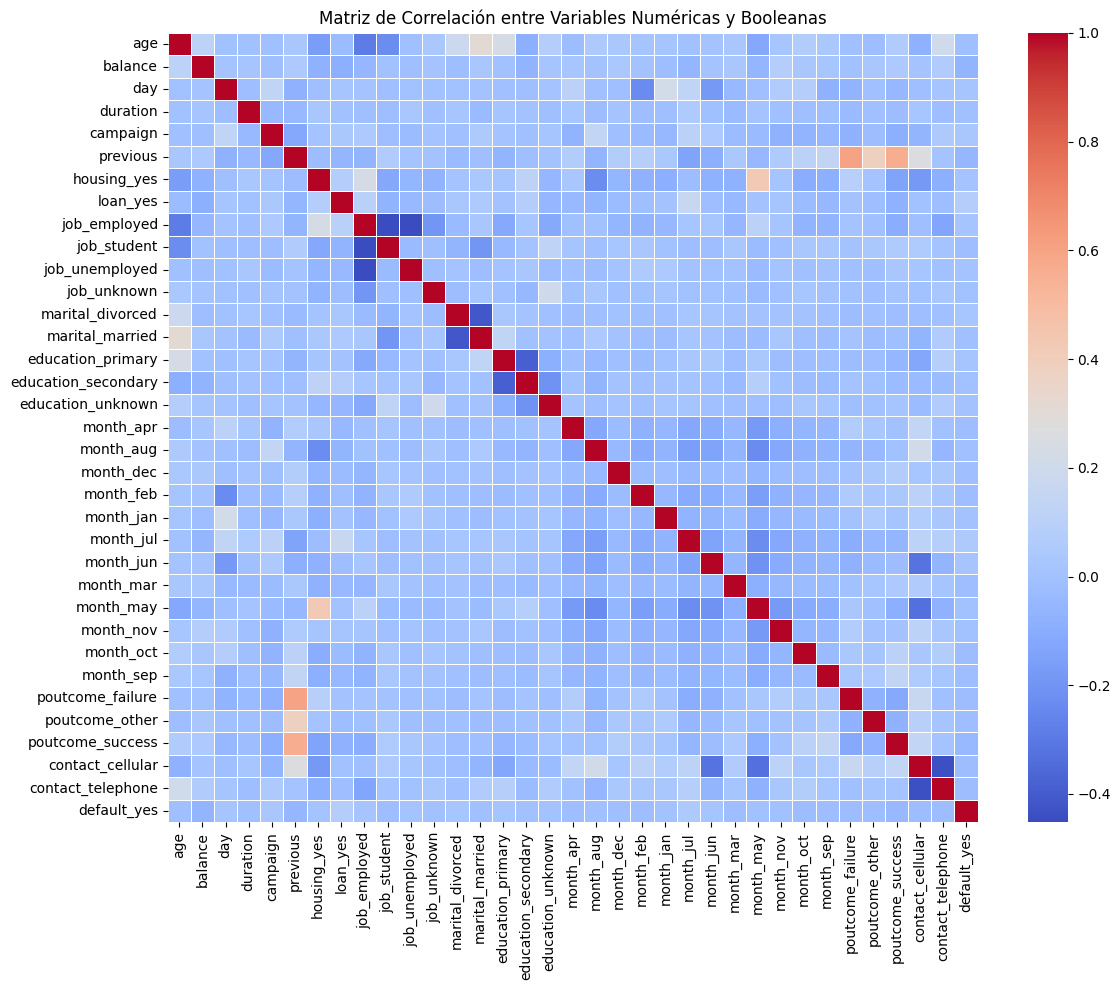

In [38]:
# Análisis de correlación
plt.figure(figsize=(12, 10))
# Seleccionamos solo columnas numéricas y booleanas para la matriz de correlación
numeric_and_bool_cols = data2.select_dtypes(include=['int64', 'float64', 'bool']).columns
correlation = data2[numeric_and_bool_cols].corr()
sns.heatmap(correlation, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación entre Variables Numéricas y Booleanas')
plt.tight_layout()
plt.show()

In [39]:
# Separación entre variables predictoras y objetivo
X = data2.drop('deposit_yes', axis=1) if 'deposit_yes' in data2.columns else data2.drop('deposit', axis=1)
y = data2['deposit_yes'] if 'deposit_yes' in data2.columns else data2['deposit'].map({'yes': 1, 'no': 0})

# División de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.55, random_state=42)

In [40]:
#Inicializar los modelos
random_forest_model = RandomForestClassifier(n_estimators=250, oob_score=True, random_state=42)

# Entrenar los modelos
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=250, oob_score=True, random_state=42)

In [41]:
#Predicciones
random_forest_predictions = random_forest_model.predict(X_test)

# Precisión
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)
print(f"Precisión del Bosque Aleatorio: {random_forest_accuracy:.4f}")

Precisión del Bosque Aleatorio: 0.8479


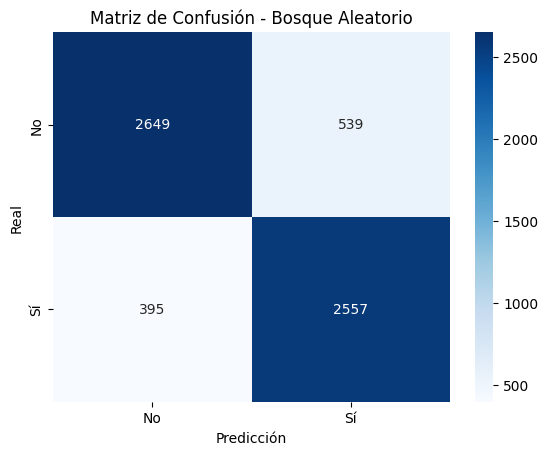

In [42]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No', 'Sí'],
                yticklabels=['No', 'Sí'])
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.title(title)
    plt.show()
plot_confusion_matrix(y_test, random_forest_predictions, "Matriz de Confusión - Bosque Aleatorio")

In [43]:
print("Reporte de Clasificación - Bosque Aleatorio")
print(classification_report(y_test, random_forest_predictions))

Reporte de Clasificación - Bosque Aleatorio
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      3188
           1       0.83      0.87      0.85      2952

    accuracy                           0.85      6140
   macro avg       0.85      0.85      0.85      6140
weighted avg       0.85      0.85      0.85      6140



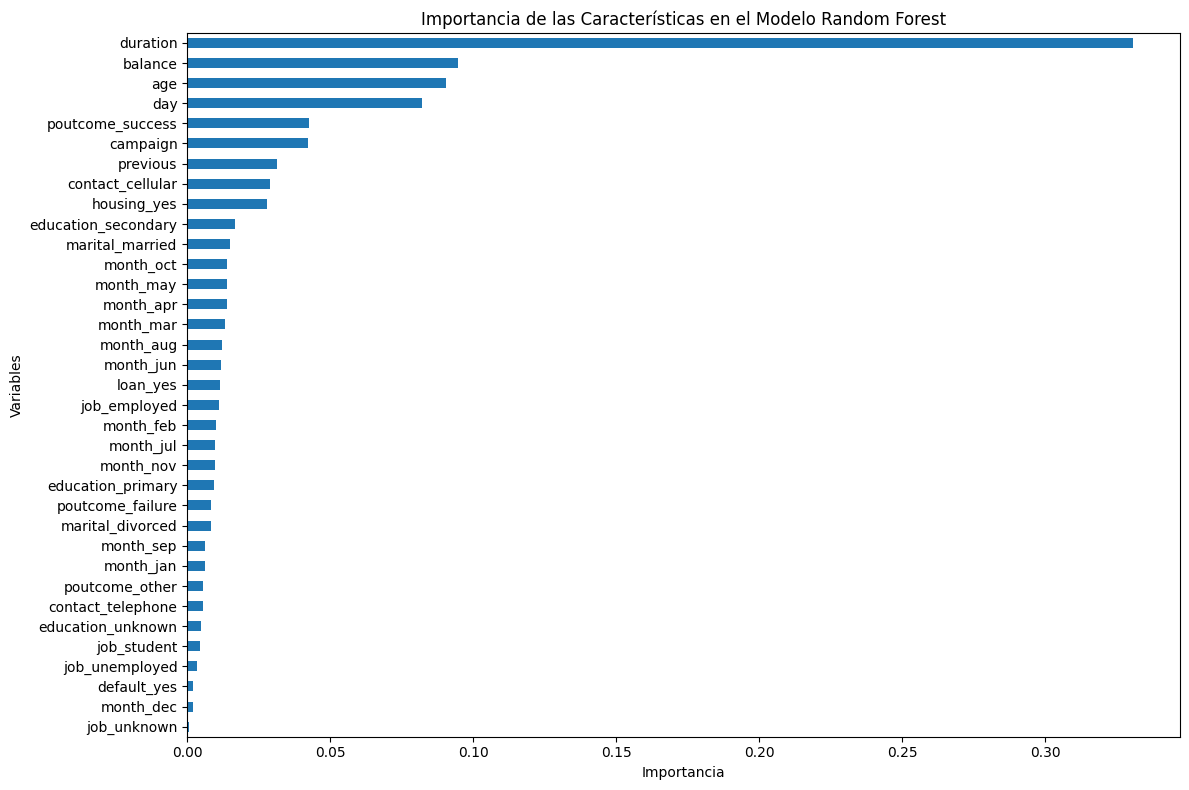

In [44]:
# Importancia de las características para el modelo Random Forest
feature_importances = pd.Series(random_forest_model.feature_importances_, index=X_train.columns)
sorted_feature_importances = feature_importances.sort_values(ascending=True) # Orden descendente para que la barra más larga esté arriba

# Crear el gráfico de barras horizontal
plt.figure(figsize=(12, 8))
sorted_feature_importances.plot(kind='barh')
plt.title('Importancia de las Características en el Modelo Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Variables')
plt.tight_layout()
plt.show()